In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("heart.csv")
defaulter_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (303, 14)


In [5]:
print("Target variable frequency distribution : \n", defaulter_df["sex"].value_counts())

Target variable frequency distribution : 
 1    207
0     96
Name: sex, dtype: int64


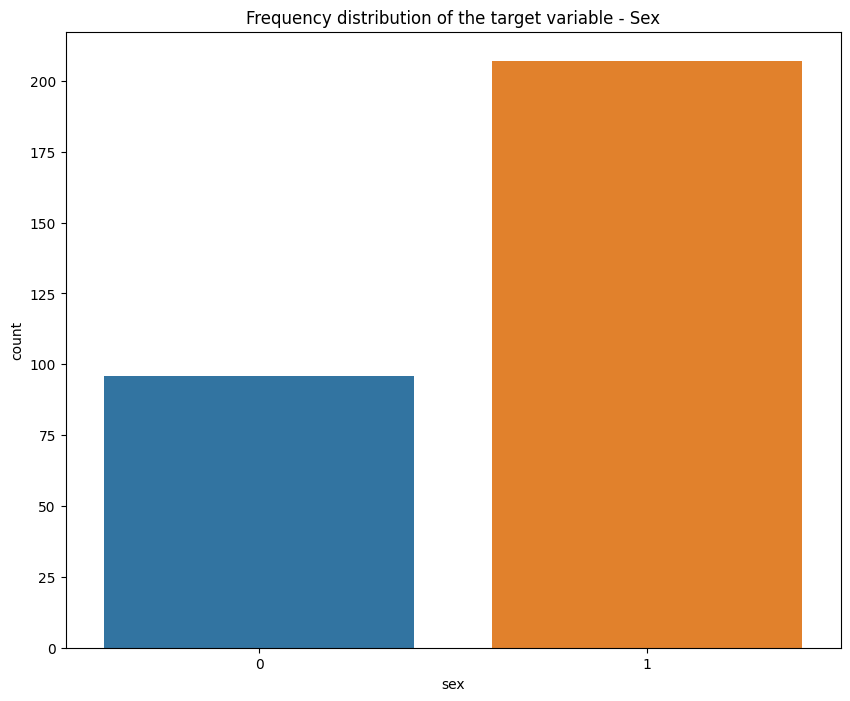

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(data=defaulter_df, x="sex")
plt.title("Frequency distribution of the target variable - Sex")
plt.show()

In [7]:
X = defaulter_df[["trtbps", "chol"]]
y = defaulter_df["sex"]

# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  242
Size of test data :  61


# Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed


array([[ 0.57142857,  0.33487298],
       [ 0.7755102 ,  0.36258661],
       [ 0.57142857, -0.01154734],
       [ 0.40816327,  0.64203233],
       [ 0.16326531,  0.30946882],
       [ 0.57142857,  0.08545035],
       [ 0.44897959,  0.25866051],
       [ 1.08163265,  0.36258661],
       [ 0.28571429,  0.35796767],
       [ 0.31632653,  0.32794457],
       [ 0.46938776,  0.1408776 ],
       [ 0.85714286,  0.32101617],
       [ 0.26530612,  0.44803695],
       [ 0.16326531,  0.08314088],
       [ 0.1122449 ,  0.16859122],
       [ 0.46938776,  0.24018476],
       [ 0.24489796,  0.18244804],
       [ 0.26530612,  0.13163972],
       [ 0.46938776,  0.41570439],
       [ 0.44897959,  0.08083141],
       [ 0.7755102 ,  0.22170901],
       [ 0.36734694,  0.35103926],
       [ 0.26530612,  0.2448037 ],
       [ 0.67346939,  0.39491917],
       [ 0.24489796,  0.25635104],
       [ 0.59183673,  0.21247113],
       [ 0.67346939,  0.32794457],
       [ 0.46938776,  0.30023095],
       [ 0.7244898 ,

In [13]:
X_train["trtbps_normalized"] = train_transformed[:,0]
X_train["chol_normalized"] = train_transformed[:,1]
X_train.head()

,trtbps,chol,trtbps_normalized,chol_normalized
132,120,295,0.265306,0.378753
202,150,270,0.571429,0.321016
196,150,231,0.571429,0.230947
75,135,250,0.418367,0.274827
176,117,230,0.234694,0.228637


In [14]:
X_test["trtbps_normalized"] = transformed[:,0]
X_test["chol_normalized"] = transformed[:,1]
X_test.head()

,trtbps,chol,trtbps_normalized,chol_normalized
179,150,276,0.571429,0.334873
228,170,288,0.775510,0.362587
111,150,126,0.571429,-0.011547
246,134,409,0.408163,0.642032
60,110,265,0.163265,0.309469


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["trtbps","chol"]], y_train)
predictions = knn.predict(X_test[["trtbps","chol"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.6721311475409836

In [18]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["trtbps_normalized","chol_normalized"]], y_train)
predictions = knn.predict(X_test[["trtbps_normalized","chol_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.6229508196721312

In [19]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [20]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1","0"], index = ["1","0"])

,1,0
1,5,8
0,15,33


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      0.38      0.30        13
           1       0.80      0.69      0.74        48

    accuracy                           0.62        61
   macro avg       0.53      0.54      0.52        61
weighted avg       0.69      0.62      0.65        61



# Sampling Techniques to handle imbalanced Dataset

## 1. UnderSampling (downsampling)

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
print("Before undersampling: \n", y_train.value_counts())

Before undersampling: 
 1    159
0     83
Name: sex, dtype: int64


In [24]:
under_sampling = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_train_under, y_train_under  = under_sampling.fit_resample(X_train, y_train)

In [25]:
print("After undersampling: \n", y_train_under.value_counts())

After undersampling: 
 0    83
1    83
Name: sex, dtype: int64


In [26]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_under[["trtbps_normalized","chol_normalized"]], y_train_under)
predictions = knn.predict(X_test[["trtbps_normalized","chol_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.47540983606557374

In [27]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1","0"], index = ["1","0"])

,1,0
1,6,7
0,25,23


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.19      0.46      0.27        13
           1       0.77      0.48      0.59        48

    accuracy                           0.48        61
   macro avg       0.48      0.47      0.43        61
weighted avg       0.64      0.48      0.52        61



## 2. OverSampling(Up Sampling)

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
print("Before oversampling: \n", y_train.value_counts())

Before oversampling: 
 1    159
0     83
Name: sex, dtype: int64


In [31]:
over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over  = over_sampling.fit_resample(X_train, y_train)

In [32]:
print("After oversampling: \n", y_train_over.value_counts())

After oversampling: 
 1    159
0    159
Name: sex, dtype: int64


In [33]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_over[["trtbps_normalized","chol_normalized"]], y_train_over)
predictions = knn.predict(X_test[["trtbps_normalized","chol_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.5409836065573771

In [34]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1","0"], index = ["1","0"])

,1,0
1,7,6
0,22,26


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.24      0.54      0.33        13
           1       0.81      0.54      0.65        48

    accuracy                           0.54        61
   macro avg       0.53      0.54      0.49        61
weighted avg       0.69      0.54      0.58        61



## 3. SMOTE (Synthetic Minority Oversampling Technique)

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
print("Before SMOTE: \n", y_train.value_counts())

Before SMOTE: 
 1    159
0     83
Name: sex, dtype: int64


In [38]:
smote = SMOTE()
X_train_smote, y_train_smote  = smote.fit_resample(X_train, y_train)

In [39]:
print("After SMOTE: \n", y_train_smote.value_counts())

After SMOTE: 
 1    159
0    159
Name: sex, dtype: int64


In [40]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_smote[["trtbps_normalized","chol_normalized"]], y_train_smote)
predictions = knn.predict(X_test[["trtbps_normalized","chol_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.4918032786885246

In [41]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1","0"], index = ["1","0"])

,1,0
1,6,7
0,24,24


In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.20      0.46      0.28        13
           1       0.77      0.50      0.61        48

    accuracy                           0.49        61
   macro avg       0.49      0.48      0.44        61
weighted avg       0.65      0.49      0.54        61



# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_clf = LogisticRegression()
log_clf.fit(X_train[["trtbps_normalized","chol_normalized"]], y_train)
predictions = log_clf.predict(X_test[["trtbps_normalized","chol_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.7868852459016393

In [45]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1","0"], index = ["1","0"])

,1,0
1,0,13
0,0,48


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.79      1.00      0.88        48

    accuracy                           0.79        61
   macro avg       0.39      0.50      0.44        61
weighted avg       0.62      0.79      0.69        61



In [47]:
log_clf_balanced = LogisticRegression(class_weight = "balanced")
log_clf_balanced.fit(X_train[["trtbps_normalized","chol_normalized"]], y_train)
predictions = log_clf_balanced.predict(X_test[["trtbps_normalized","chol_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.5245901639344263

In [48]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["1","0"], index = ["1","0"])

,1,0
1,7,6
0,23,25


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.23      0.54      0.33        13
           1       0.81      0.52      0.63        48

    accuracy                           0.52        61
   macro avg       0.52      0.53      0.48        61
weighted avg       0.68      0.52      0.57        61

